### We will work on Automobile dataset and try to classify feature "symbol" which represents the risk level or risk rating assigned to a car.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd   
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import seaborn as sns

automobile = fetch_ucirepo(id=10) 
X = automobile.data.features 
y = automobile.data.targets 

### Short EDA

In [2]:
df_features = pd.DataFrame(X, columns=automobile.feature_names)

df_targets = pd.DataFrame(y, columns=['symboling'])
df = pd.concat([df_features, df_targets], axis=1)

In [3]:
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [4]:
df.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object

In [5]:
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [6]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [7]:
df.describe(include=object)

,fuel-system,engine-type,engine-location,drive-wheels,body-style,aspiration,fuel-type,make
count,205,205,205,205,205,205,205,205
unique,8,7,2,3,5,2,2,22
top,mpfi,ohc,front,fwd,sedan,std,gas,toyota
freq,94,148,202,120,96,168,185,32


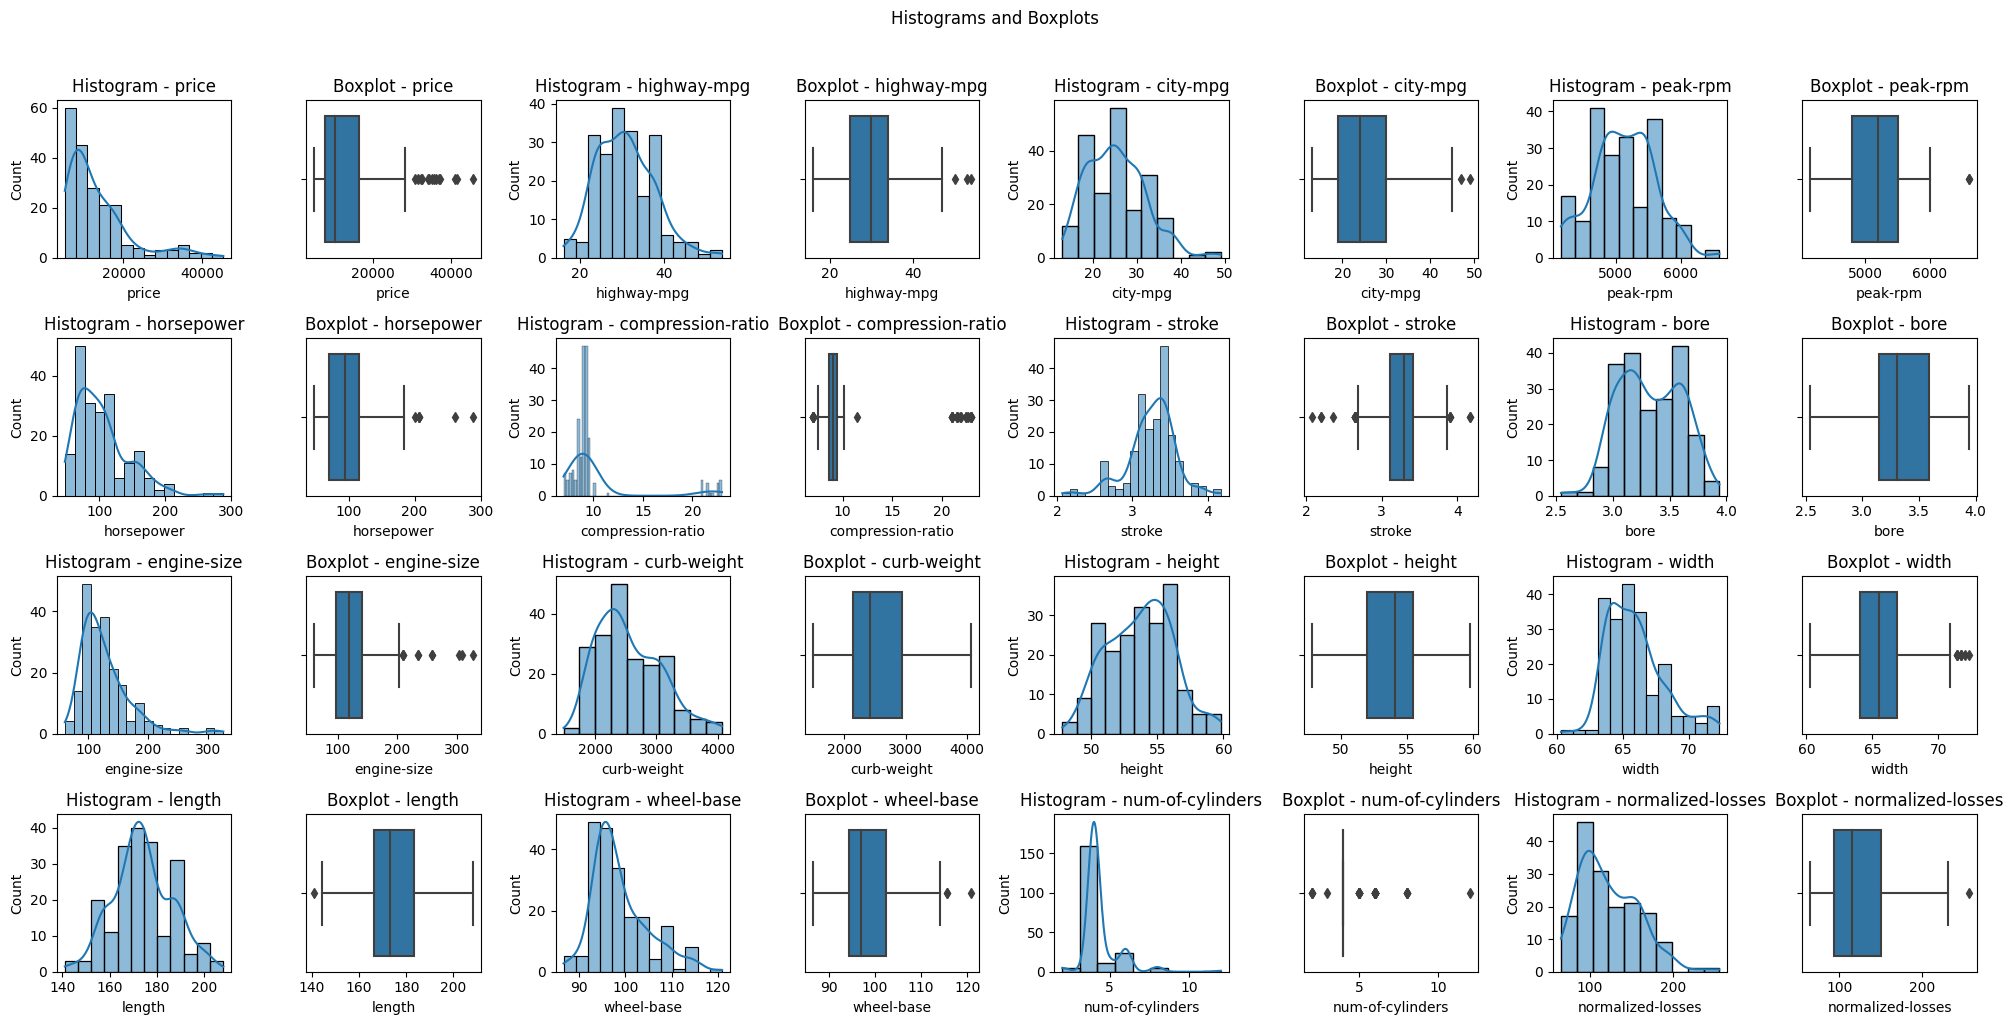

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

categories_to_plot = ["price","highway-mpg","city-mpg","peak-rpm","horsepower","compression-ratio","stroke","bore","engine-size","curb-weight","height","width","length","wheel-base","num-of-cylinders","normalized-losses"]


numerical_columns = df[categories_to_plot].select_dtypes(include=['float64', 'int64']).columns
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols * 2, figsize=(20, 10))
fig.suptitle('Histograms and Boxplots', y=1.02)

for i, col in enumerate(numerical_columns):
    row_position, col_position = divmod(i, num_cols)

    sns.histplot(df[col], ax=axes[row_position, col_position * 2], kde=True)
    axes[row_position, col_position * 2].set_title('Histogram - {}'.format(col))

    sns.boxplot(x=df[col], ax=axes[row_position, col_position * 2 + 1])
    axes[row_position, col_position * 2 + 1].set_title('Boxplot - {}'.format(col))

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

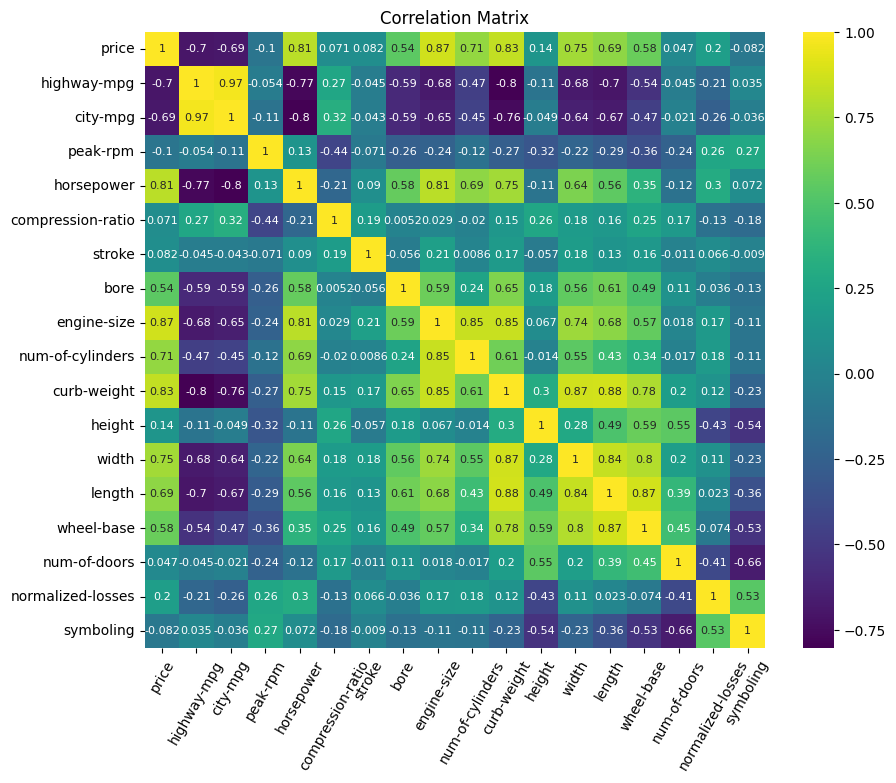

In [9]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', annot_kws={"size": 8})
plt.xticks(rotation=60)
plt.title('Correlation Matrix')
plt.show()

In [10]:
df.columns

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses',
       'symboling'],
      dtype='object')

## Processing data and applying models

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report

X = df.drop('symboling', axis=1)
y = df['symboling']

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
precision_ratings = {clf_name: [] for clf_name in classifiers}
for clf_name, classifier in classifiers.items():
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('\n')
    print('Results for {}:'.format(clf_name))
    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    precision_ratings[clf_name].append(precision)
    print('Confusion Matrix:\n{}'.format(conf_matrix))
#     class_report = classification_report(y_test, y_pred)
#     print("Classification Report:\n", class_report)



Results for Logistic Regression:
Accuracy: 0.8048780487804879
Precision: 0.8048780487804879
Recall: 0.8048780487804879
Confusion Matrix:
[[ 5  1  0  0  0]
 [ 0  7  3  0  0]
 [ 0  1 11  0  1]
 [ 0  0  0  6  0]
 [ 0  0  1  1  4]]


Results for SVM:
Accuracy: 0.6585365853658537
Precision: 0.6585365853658537
Recall: 0.6585365853658537
Confusion Matrix:
[[ 1  5  0  0  0]
 [ 0  8  2  0  0]
 [ 0  1 11  0  1]
 [ 0  4  0  2  0]
 [ 0  0  1  0  5]]


Results for KNN:
Accuracy: 0.6097560975609756
Precision: 0.6097560975609756
Recall: 0.6097560975609756
Confusion Matrix:
[[ 3  3  0  0  0]
 [ 0  8  1  1  0]
 [ 0  1 10  1  1]
 [ 0  3  1  2  0]
 [ 0  0  3  1  2]]


Results for Neural Network:
Accuracy: 0.8536585365853658
Precision: 0.8536585365853658
Recall: 0.8536585365853658
Confusion Matrix:
[[ 5  1  0  0  0]
 [ 0  8  2  0  0]
 [ 0  0 11  1  1]
 [ 0  0  0  6  0]
 [ 0  0  0  1  5]]


Results for Naive Bayes:
Accuracy: 0.6097560975609756
Precision: 0.6097560975609756
Recall: 0.6097560975609756
Conf

### adjusting hyperparameters manually

In [16]:
classifiers = {
    'Logistic Regression': LogisticRegression(
                                        max_iter=1000,
                                        solver='liblinear',
                                        C=100),
    'SVM': SVC(
                C=500, 
                kernel='linear'),
    'KNN': KNeighborsClassifier(
                            n_neighbors=7, 
                            weights='distance',
                            algorithm='ball_tree',
                            p = 1),
    'Neural Network': MLPClassifier(
                            hidden_layer_sizes=(100,50),
                            activation='logistic',
                            alpha=0.005,
                            solver='adam',
                            learning_rate='constant',  
                            max_iter=500,
                            learning_rate_init=0.01
                        ),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(
                            criterion='entropy',
                            splitter='best',
                            max_depth=None,
                            min_samples_split=5,
                            min_samples_leaf=2
                        ),
    'Random Forest': RandomForestClassifier(
                            n_estimators=50,
                            criterion='entropy',
                            max_depth=None,
                            min_samples_split=5,
                            min_samples_leaf=1,
                            bootstrap=True
                        )
}


for clf_name, classifier in classifiers.items():
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('\n')
    print('Results for {}:'.format(clf_name))
    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('Confusion Matrix:\n{}'.format(conf_matrix))
    precision_ratings[clf_name].append(precision)



Results for Logistic Regression:
Accuracy: 0.7317073170731707
Precision: 0.7317073170731707
Recall: 0.7317073170731707
Confusion Matrix:
[[ 0  1  0  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  0 11  1  0  0]
 [ 0  0  0 10  2  0]
 [ 0  0  0  0  4  0]
 [ 0  0  1  1  3  2]]


Results for SVM:
Accuracy: 0.8048780487804879
Precision: 0.8048780487804879
Recall: 0.8048780487804879
Confusion Matrix:
[[ 1  0  0  0  0  0]
 [ 1  3  0  1  0  0]
 [ 0  0 11  1  0  0]
 [ 0  0  0 11  1  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  1  3  3]]


Results for KNN:
Accuracy: 0.7804878048780488
Precision: 0.7804878048780488
Recall: 0.7804878048780488
Confusion Matrix:
[[ 0  1  0  0  0  0]
 [ 0  4  1  0  0  0]
 [ 0  0 11  1  0  0]
 [ 0  0  1 10  1  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  1  3  3]]


Results for Neural Network:
Accuracy: 0.7560975609756098
Precision: 0.7560975609756098
Recall: 0.7560975609756098
Confusion Matrix:
[[ 0  1  0  0  0  0]
 [ 0  3  2  0  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0  0 11  1  0]
 [ 0  0  0  0  4

## adjusting parameters using gridsearch

In [101]:
from sklearn.model_selection import GridSearchCV

In [252]:
logistic_regression_param_grid = [
    {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        "classifier__max_iter": [10000]
    }
]

In [253]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
grid_search = GridSearchCV(model, logistic_regression_param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

print("Best parameters set found on development set:")
print(grid_search.best_params_)

Best parameters set found on development set:
{'classifier__C': 0.001, 'classifier__max_iter': 10000, 'classifier__solver': 'newton-cg'}


In [244]:
svm_param_grid = [
    {
        'classifier__C': [0.1,0.5,1,2,5,10,100],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto', 0.1, 1, 10]
    }
]


In [245]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])
grid_search = GridSearchCV(model, svm_param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters set found on development set:")
print(grid_search.best_params_)

Best parameters set found on development set:
{'classifier__C': 2, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}


In [236]:
knn_param_grid = [
    {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1,1.5,2]
    }
]


In [237]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
grid_search = GridSearchCV(model, knn_param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters set found on development set:")
print(grid_search.best_params_)

Best parameters set found on development set:
{'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'distance'}


In [262]:
param_grid = [
    {
        'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
        'classifier__solver': ['lbfgs', 'sgd', 'adam'],
        'classifier__max_iter':[2000],
        'classifier__learning_rate_init':[0.0001,0.001,0.005,0.01,0.1],
        'classifier__alpha':[0.0001,0.001,0.005,0.01,0.1],
        'classifier__hidden_layer_sizes': [(1,), (2,), (5,), (7,), (10,), (15,), (20,),(30,),(50,),(100,)]
    }
]

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier())
])
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters set found on development set:")
print(grid_search.best_params_)


In [99]:
decision_tree_param_grid = [
    {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2,3,4, 5,6,7,8,9, 10,12,15],
        'classifier__min_samples_leaf':[1,2,3,5,7,9]
    }
]


In [110]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
grid_search = GridSearchCV(model, decision_tree_param_grid,  scoring='accuracy')
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters set found on development set:")
print(grid_search.best_params_)

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters set found on development set:
{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}


In [103]:
random_forest_param_grid = [
    {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2,3,4, 5,6,7,8,9, 10,12,15],
        'classifier__min_samples_leaf':[1,2,3,5,7,9]
    }
]


In [104]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
grid_search = GridSearchCV(model, random_forest_param_grid, cv=1, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters set found on development set:")
print(grid_search.best_params_)

Best parameters set found on development set:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 50}


## simulating 1000 times basic models and models with adjusted parameters and comparing average scores

In [22]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

precision_ratings = {clf_name: [] for clf_name in classifiers}


for _ in range(1000):
    for clf_name, classifier in classifiers.items():
        model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', classifier)])

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='micro')
        conf_matrix = confusion_matrix(y_test, y_pred)
#         print('\n')
#         print('Results for {}:'.format(clf_name))
#         print('Accuracy: {}'.format(accuracy))
#         print('Precision: {}'.format(precision))
        precision_ratings[clf_name].append(precision)
#         print('Confusion Matrix:\n{}'.format(conf_matrix))

In [115]:
precision_ratings_tuned = {clf_name: [] for clf_name in classifiers}
classifiers = {
    'Logistic Regression': LogisticRegression(
                                        max_iter=2000,
                                        solver='newton-cg',
                                        C=2),
    'SVM': SVC(
                C=5, 
                gamma=.5,
                kernel='rbf'),
    'KNN': KNeighborsClassifier(
                            n_neighbors=7, 
                            weights='distance',
                            p = 2),
    'Neural Network': MLPClassifier(
                            hidden_layer_sizes=(50,),
                            activation='tanh',
                            alpha=0.001,
                            solver='adam',
                            learning_rate='constant',  
                            max_iter=1000,
                            learning_rate_init=0.005
                        ),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(
                            criterion='entropy',
                            splitter='best',
                            max_depth=None,
                            min_samples_split=5,
                            min_samples_leaf=1
                        ),
    'Random Forest': RandomForestClassifier(
                            n_estimators=50,
                            criterion='entropy',
                            max_depth=10,
                            min_samples_split=7,
                            min_samples_leaf=1,
                            bootstrap=True
                        )
}

In [116]:
for _ in range(1000):
    for clf_name, classifier in classifiers.items():
        model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', classifier)])

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='micro')

        conf_matrix = confusion_matrix(y_test, y_pred)
    #     print('\n')
    #     print('Results for {}:'.format(clf_name))
    #     print('Accuracy: {}'.format(accuracy))
    #     print('Precision: {}'.format(precision))
    #     print('Confusion Matrix:\n{}'.format(conf_matrix))
        precision_ratings_tuned[clf_name].append(precision)

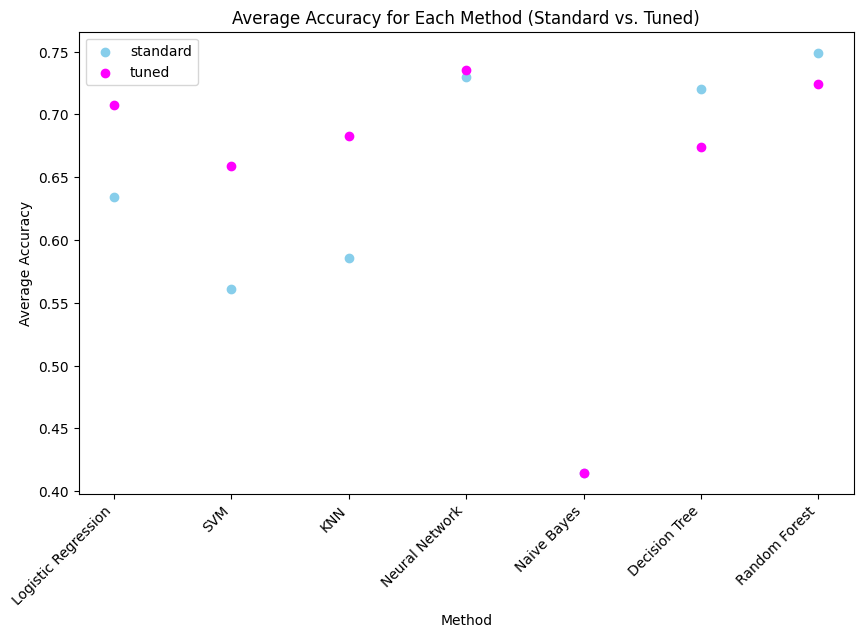

In [117]:
avg_accuracies = {method: np.mean(accuracies) for method, accuracies in precision_ratings.items()}
avg_accuracies_tuned = {method: np.mean(accuracies) for method, accuracies in precision_ratings_tuned.items()}


methods = list(avg_accuracies.keys())
avg_accuracies_values = list(avg_accuracies.values())

methods_tuned = list(avg_accuracies_tuned.keys())
avg_accuracies_values_tuned = list(avg_accuracies_tuned.values())

plt.figure(figsize=(10, 6))
plt.scatter(methods, avg_accuracies_values, color='skyblue',label="standard")
plt.scatter(methods_tuned, avg_accuracies_values_tuned, color='magenta',label="tuned")
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Method')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Each Method (Standard vs. Tuned)')
plt.legend()
plt.show()

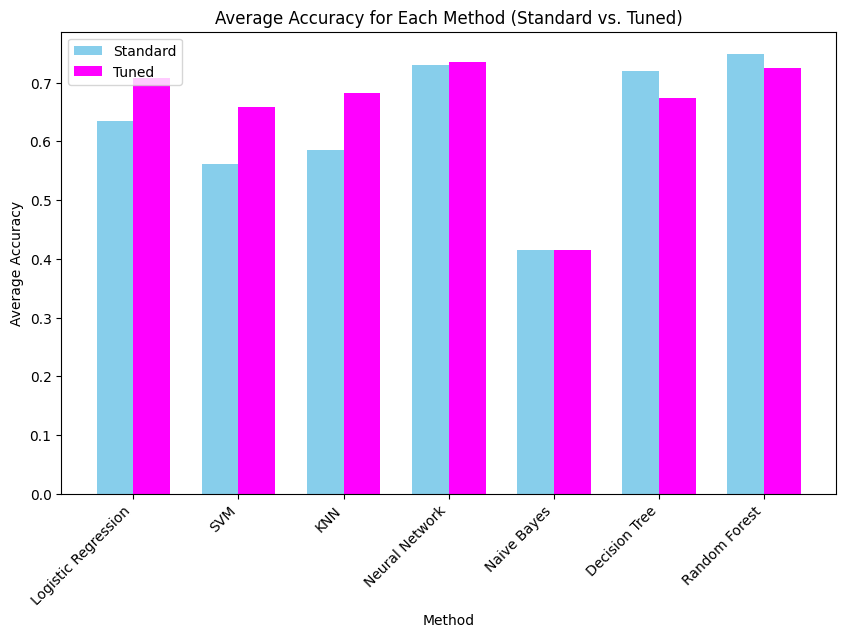

In [118]:
bar_width = 0.35
index = np.arange(len(methods))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, avg_accuracies_values, bar_width, label='Standard', color='skyblue')
bar2 = plt.bar(index + bar_width, avg_accuracies_values_tuned, bar_width, label='Tuned', color='magenta')

plt.xlabel('Method')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Each Method (Standard vs. Tuned)')
plt.xticks(index + bar_width / 2, methods, rotation=45, ha='right')
plt.legend()
plt.show()